# Porject: Congestion Patterns in Chicago

## Source ##
**Data**: Chicago Traffic Tracker - Historical Congestion Estimates by Region - 2018-Current ##
**Data Owner**	: Chicago Department of Transportation

**Time Period**	March 2018 - Current, with occasional gaps due to system maintenance and other temporary technical issues

**Frequency**	Data are updated every 15 minutes


**Observation Period**:

Timestamp('2023-01-01 14:51:27')

Timestamp('2023-09-08 12:51:17')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from shapely.geometry import Polygon
import geopandas as gpd

In [2]:
# API(CSV): https://data.cityofchicago.org/resource/kf7e-cur8.csv?$query=SELECT%0A%20%20%60time%60%2C%0A%20%20%60region_id%60%2C%0A%20%20%60speed%60%2C%0A%20%20%60region%60%2C%0A%20%20%60bus_count%60%2C%0A%20%20%60num_reads%60%2C%0A%20%20%60hour%60%2C%0A%20%20%60day_of_week%60%2C%0A%20%20%60month%60%2C%0A%20%20%60description%60%2C%0A%20%20%60record_id%60%2C%0A%20%20%60west%60%2C%0A%20%20%60east%60%2C%0A%20%20%60south%60%2C%0A%20%20%60north%60%2C%0A%20%20%60nw_location%60%2C%0A%20%20%60se_location%60%2C%0A%20%20%60%3A%40computed_region_vrxf_vc4k%60%2C%0A%20%20%60%3A%40computed_region_6mkv_f3dw%60%2C%0A%20%20%60%3A%40computed_region_43wa_7qmu%60
# API(JSON): https://data.cityofchicago.org/resource/kf7e-cur8.json?$query=SELECT%0A%20%20%60time%60%2C%0A%20%20%60region_id%60%2C%0A%20%20%60speed%60%2C%0A%20%20%60region%60%2C%0A%20%20%60bus_count%60%2C%0A%20%20%60num_reads%60%2C%0A%20%20%60hour%60%2C%0A%20%20%60day_of_week%60%2C%0A%20%20%60month%60%2C%0A%20%20%60description%60%2C%0A%20%20%60record_id%60%2C%0A%20%20%60west%60%2C%0A%20%20%60east%60%2C%0A%20%20%60south%60%2C%0A%20%20%60north%60%2C%0A%20%20%60nw_location%60%2C%0A%20%20%60se_location%60%2C%0A%20%20%60%3A%40computed_region_vrxf_vc4k%60%2C%0A%20%20%60%3A%40computed_region_6mkv_f3dw%60%2C%0A%20%20%60%3A%40computed_region_43wa_7qmu%60

traffic_data = pd.read_csv('/Users/jinwens/Desktop/2023Fall/STAT303/project/Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Region_-_2018-Current.csv')
traffic_data 

,TIME,REGION_ID,SPEED,REGION,BUS_COUNT,NUM_READS,HOUR,DAY_OF_WEEK,MONTH,DESCRIPTION,RECORD_ID,WEST,EAST,SOUTH,NORTH,NW_LOCATION,SE_LOCATION,Community Areas,Zip Codes,Wards
0,04/08/2023 10:51:26 PM,29,21.82,Downtown Lakefront,17,166,22,7,4,Roosevelt to Oak. Michigan to Lake Shore,29-202304090351,-87.623080,-87.595378,41.866129,41.911401,POINT (-87.62308 41.911401),POINT (-87.595378 41.866129),NaN,14926,NaN
1,04/08/2023 10:51:26 PM,23,26.59,Auburn Gresham-Chatham,42,946,22,7,4,91st to 71st. Damen to Cottage Grove,23-202304090351,-87.672980,-87.606334,41.728472,41.764066,POINT (-87.67298 41.764066),POINT (-87.606334 41.728472),65.0,22257,31.0
2,04/08/2023 10:51:26 PM,28,0.00,Riverdale-Hegewisch,3,128,22,7,4,138th to 119th. Ashland to State Line,28-202304090351,-87.662508,-87.524436,41.644139,41.677477,POINT (-87.662508 41.677477),POINT (-87.524436 41.644139),NaN,4460,NaN
3,04/08/2023 10:51:26 PM,27,27.95,South Deering-East Side,18,385,22,7,4,119th to 91st. Stony Island to State Line,27-202304090351,-87.584845,-87.524436,41.677477,41.728472,POINT (-87.584845 41.728472),POINT (-87.524436 41.677477),44.0,21202,35.0
4,04/08/2023 10:51:26 PM,24,24.55,South Shore-S Chicago-Avlon,27,664,22,7,4,91st to 71st. Cottage Grove to Lake Shore,24-202304090351,-87.606334,-87.526388,41.728472,41.764066,POINT (-87.606334 41.764066),POINT (-87.526388 41.728472),67.0,21546,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983397,03/19/2023 12:01:35 AM,26,30.68,Washington Hts-Roseland-Pullman,18,431,0,1,3,119th to 91st. Ashland to Stony Island,26-202303190501,-87.662508,-87.584845,41.677477,41.728472,POINT (-87.662508 41.728472),POINT (-87.584845 41.677477),72.0,21554,13.0
983398,03/19/2023 12:01:35 AM,11,25.23,West Town-Near West,23,458,0,1,3,Roosevelt to North. Rockwell to Halsted,11-202303190501,-87.691617,-87.647208,41.866129,41.910561,POINT (-87.691617 41.910561),POINT (-87.647208 41.866129),25.0,22535,41.0
983399,03/19/2023 12:01:35 AM,6,25.16,Irving Park-Avondale-North Ctr,20,432,0,1,3,Diversey to Montrose. Cicero to Ravenswood,06-202303190501,-87.747456,-87.674590,41.931841,41.960669,POINT (-87.747456 41.960669),POINT (-87.67459 41.931841),15.0,22618,50.0
983400,03/19/2023 12:01:35 AM,25,0.00,Beverly-Mt Greenwood-Morgan Park,4,31,0,1,3,119th to 91st. Cicero to Ashland,25-202303190501,-87.747456,-87.662508,41.677477,41.728472,POINT (-87.747456 41.728472),POINT (-87.662508 41.677477),NaN,10408,NaN


In [3]:
traffic_data['SPEED'] = pd.to_numeric(traffic_data['SPEED'], errors='coerce')
traffic_data = traffic_data[(traffic_data['SPEED'] != -1) & (traffic_data['SPEED'] != 0)]
traffic_data['TIME'] = pd.to_datetime(traffic_data['TIME'])

/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_6714/2880335926.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_data['TIME'] = pd.to_datetime(traffic_data['TIME'])
/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_6714/2880335926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data['TIME'] = pd.to_datetime(traffic_data['TIME'])


In [4]:
earliest_time = traffic_data['TIME'].min()
lates_time = traffic_data['TIME'].max()
earliest_time, lates_time

(Timestamp('2023-01-01 14:51:27'), Timestamp('2023-09-08 12:51:17'))

##  Average Speeds by Regions 

In [5]:
avg_speed = traffic_data['SPEED'].mean()
avg_speed 

26.34909245439837

In [6]:
avg_speed = traffic_data.groupby('REGION')['SPEED'].mean().reset_index()
avg_speed 

,REGION,SPEED
0,Ashburn,30.989914
1,Auburn Gresham-Chatham,25.458927
2,Austin,26.291959
3,Beverly-Mt Greenwood-Morgan Park,31.821334
4,Bridgeport-McKinley-Lower West,28.004406
5,Chicago Loop,20.109850
6,Downtown Lakefront,22.465798
7,Dunning-Portage-Belmont Cragn,25.621415
8,Edge Water-Uptown,22.810392
9,Far North West,29.041933


## Differentiate Weekdays and Weekends
### Average sppeds by regions

In [17]:
weekdays_data = traffic_data[traffic_data['DAY_OF_WEEK'] <= 5]
weekends_data = traffic_data[traffic_data['DAY_OF_WEEK'] > 5]

In [18]:
avg_speed_weekdays = weekday_data['SPEED'].mean()
avg_speed_weekends = weekend_data['SPEED'].mean()
avg_speed_weekdays, avg_speed_weekends

(26.34150333191154, 26.368147301680917)

In [9]:
len(traffic_data['REGION'].unique())

29

In [10]:
# Function to create a Polygon from the boundaries
def create_polygon(row):
    return Polygon([(row['WEST'], row['NORTH']), (row['EAST'], row['NORTH']),
                    (row['EAST'], row['SOUTH']), (row['WEST'], row['SOUTH'])])

In [11]:
avg_speed = avg_speed.merge(traffic_data[['REGION', 'REGION_ID', 'WEST', 'EAST', 'SOUTH', 'NORTH']], on='REGION', how='left')

In [12]:
avg_speed = avg_speed.drop_duplicates(subset='REGION_ID')

In [64]:
avg_speed.to_csv('avg_speed.csv', index=False)

In [36]:
len(avg_speed_gdf['SPEED'])

29

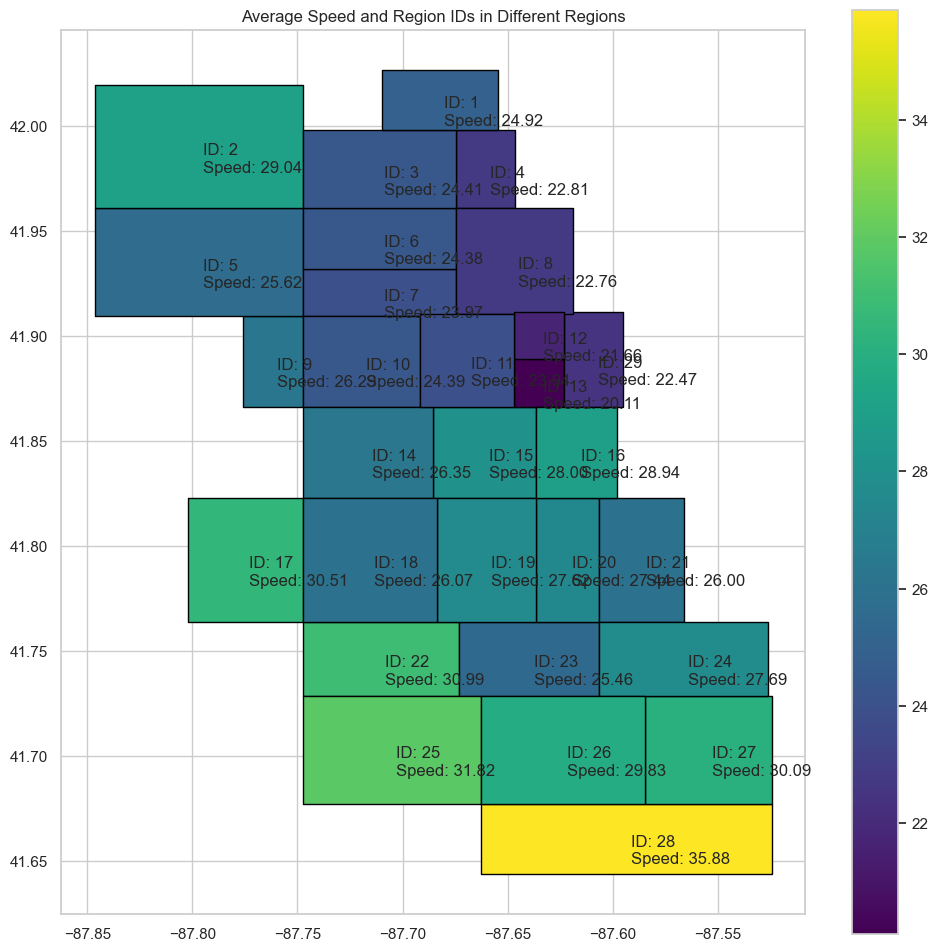

In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

# Annotating each region with the average speed and region ID
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
geo_df.plot(column='SPEED', ax=ax, legend=True, cmap='viridis', edgecolor='black')

# Adding annotations
for idx, row in geo_df.iterrows():
    plt.annotate(f"ID: {row['REGION_ID']}\nSpeed: {row['SPEED']:.2f}", 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), 
                 xytext=(3, 3), textcoords="offset points",
                 horizontalalignment='left', verticalalignment='top')

ax.set_title('Average Speed and Region IDs in Different Regions')
plt.show()

In [28]:
avg_speed_by_segment_weekday = weekday_data.groupby('REGION')['SPEED'].mean().reset_index()
region_to_id_mapping = weekday_data[['REGION', 'REGION_ID']].drop_duplicates()
avg_speed_with_id_day = avg_speed_by_segment_weekday.merge(region_to_id_mapping, on='REGION', how='left')
avg_speed_with_id_day = avg_speed_with_id_day.sort_values(by='SPEED', ascending=True)
avg_speed_with_id_day

,REGION,SPEED,REGION_ID
5,Chicago Loop,20.110929,13
18,Near North,21.708145,12
6,Downtown Lakefront,22.567035,29
16,Lincoln Park-Lake View,22.851576,8
8,Edge Water-Uptown,22.862928,4
28,West Town-Near West,23.916796,11
11,Hermosa-Logan Square,24.003012,7
12,Humboldt-Garfield Prk E/W,24.359340,10
21,North Park-Albany-Linconl Sq,24.382435,3
14,Irving Park-Avondale-North Ctr,24.386079,6


In [30]:
avg_speed_by_segment_weekend = weekend_data.groupby('REGION')['SPEED'].mean().reset_index()
region_to_id_mapping = weekend_data[['REGION', 'REGION_ID']].drop_duplicates()
avg_speed_with_id_end = avg_speed_by_segment_weekend.merge(region_to_id_mapping, on='REGION', how='left')
avg_speed_with_id_end = avg_speed_with_id_end.sort_values(by='SPEED', ascending=True)
avg_speed_with_id_end

,REGION,SPEED,REGION_ID
5,Chicago Loop,20.107138,13
18,Near North,21.544724,12
6,Downtown Lakefront,22.210100,29
16,Lincoln Park-Lake View,22.540944,8
8,Edge Water-Uptown,22.678444,4
11,Hermosa-Logan Square,23.872587,7
28,West Town-Near West,24.013016,11
14,Irving Park-Avondale-North Ctr,24.355805,6
21,North Park-Albany-Linconl Sq,24.462271,3
12,Humboldt-Garfield Prk E/W,24.463951,10


**Visualization**

In [23]:
average_speed_weekdays = weekdays_data.groupby('REGION_ID')['SPEED'].mean().reset_index()
average_speed_weekends = weekends_data.groupby('REGION_ID')['SPEED'].mean().reset_index()

# Merge the weekday and weekend averages on REGION_ID
average_speed_combined = pd.merge(average_speed_weekdays, average_speed_weekends, on='REGION_ID', how='outer', suffixes=('_weekday', '_weekend'))

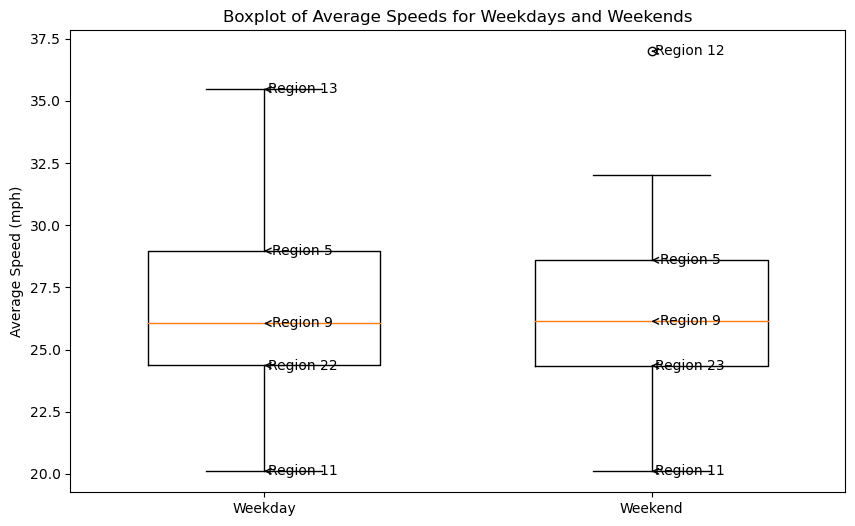

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

# Adding data for boxplots
data = [average_speed_combined['SPEED_weekday'], average_speed_combined['SPEED_weekend']]
ax.boxplot(data, positions=[1, 2], widths=0.6)

# Adding labels for identification
ax.set_xticklabels(['Weekday', 'Weekend'])
ax.set_ylabel('Average Speed (mph)')
ax.set_title('Boxplot of Average Speeds for Weekdays and Weekends')

# Annotate the statistics
for i, day_type in enumerate(['SPEED_weekday', 'SPEED_weekend'], start=1):
    stats = average_speed_combined[day_type].describe()
    y_values = [stats['min'], stats['25%'], stats['50%'], stats['75%'], stats['max']]
    region_ids = average_speed_combined.iloc[average_speed_combined[day_type].rank(method='min').astype(int) - 1]['REGION_ID']
    
    for y, region_id in zip(y_values, region_ids):
        ax.annotate(f'Region {int(region_id)}', xy=(i, y), xytext=(i+0.1, y),
                    textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                    ha='center', va='center')



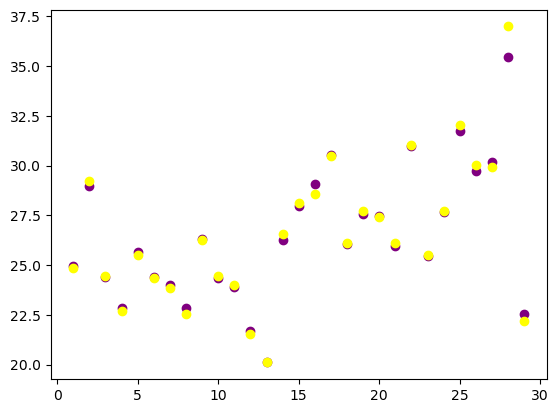

In [32]:
plt.scatter(avg_speed_with_id_day['REGION_ID'], avg_speed_with_id_day['SPEED'], label='Weekdays', marker='o', color = 'purple')

plt.scatter(avg_speed_with_id_end['REGION_ID'], avg_speed_with_id_end['SPEED'], label='Weekends', marker='o', color = 'yellow')


### Average sppeds by time

/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

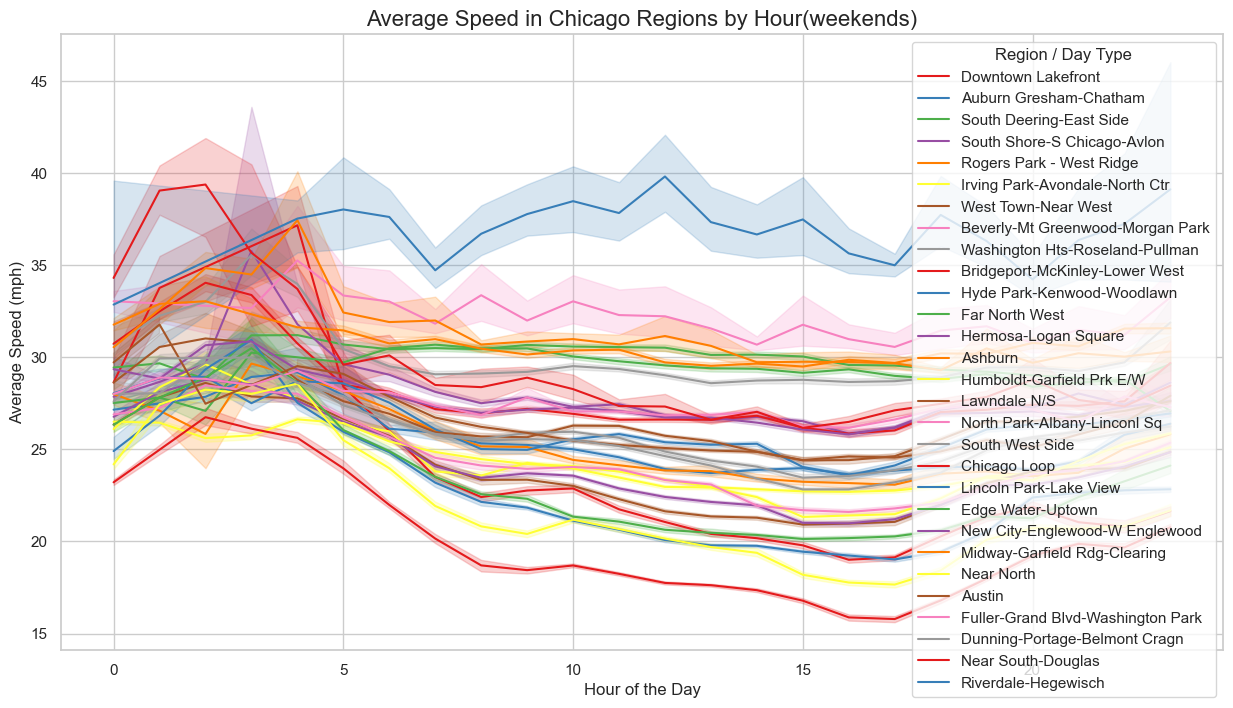

In [34]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=weekends_data, x='HOUR', y='SPEED', hue='REGION', ax=ax, palette='Set1')
ax.set_title('Average Speed in Chicago Regions by Hour(weekends)', fontsize=16)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Average Speed (mph)', fontsize=12)
ax.legend(title='Region / Day Type', loc='upper right')
plt.show()

/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jinwens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

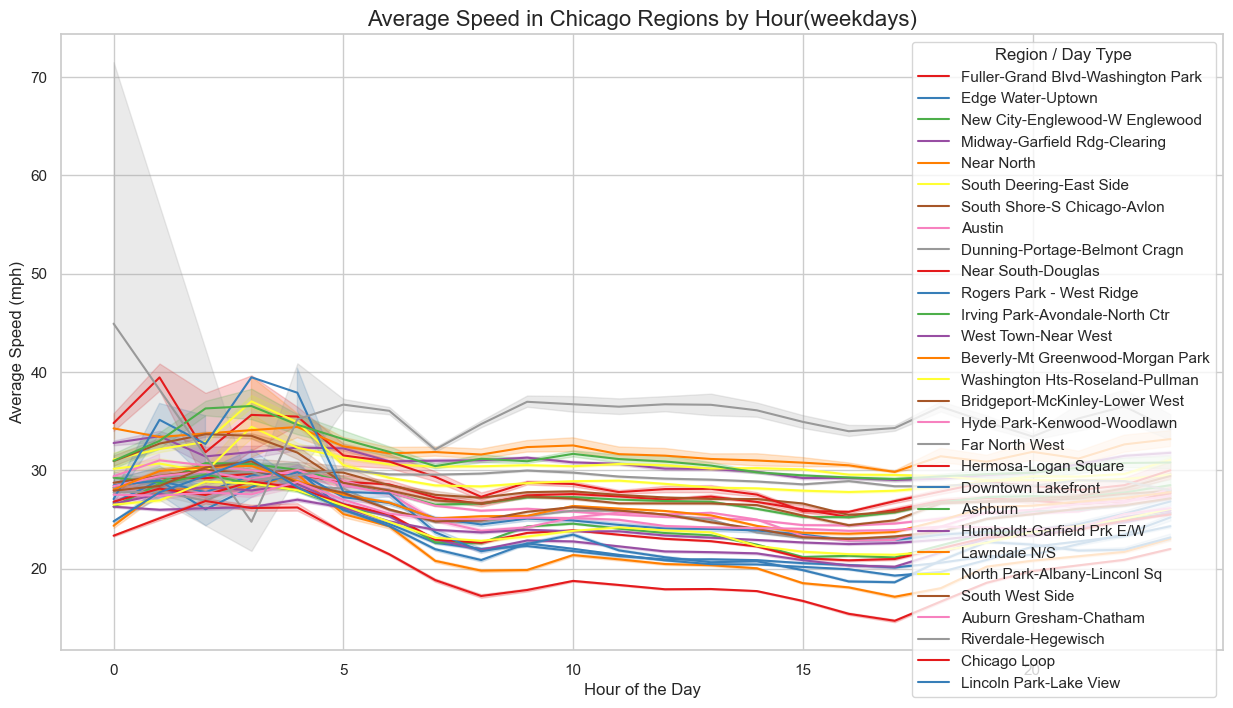

In [35]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=weekdays_data, x='HOUR', y='SPEED', hue='REGION', ax=ax, palette='Set1')
ax.set_title('Average Speed in Chicago Regions by Hour(weekdays)', fontsize=16)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Average Speed (mph)', fontsize=12)
ax.legend(title='Region / Day Type', loc='upper right')
plt.show()

### Visualization: Regional Analysis 

In [31]:
import geopandas as gpd
from shapely.geometry import MultiPolygon
from skimpy import clean_columns

In [37]:
regions_details = traffic_data[['REGION_ID', 'WEST', 'EAST', 'SOUTH', 'NORTH']].drop_duplicates()

In [38]:
regions_details

,REGION_ID,WEST,EAST,SOUTH,NORTH
0,29,-87.623080,-87.595378,41.866129,41.911401
1,23,-87.672980,-87.606334,41.728472,41.764066
3,27,-87.584845,-87.524436,41.677477,41.728472
4,24,-87.606334,-87.526388,41.728472,41.764066
6,1,-87.709645,-87.654561,41.997946,42.026444
7,6,-87.747456,-87.674590,41.931841,41.960669
8,11,-87.691617,-87.647208,41.866129,41.910561
9,25,-87.747456,-87.662508,41.677477,41.728472
10,26,-87.662508,-87.584845,41.677477,41.728472
11,15,-87.685372,-87.636322,41.822792,41.866129


In [39]:
average_speed_weekday = weekdays_data.groupby('REGION_ID')['SPEED'].mean().reset_index()
average_speed_weekend = weekdays_data.groupby('REGION_ID')['SPEED'].mean().reset_index()
weekday_data = pd.merge(regions_details, average_speed_weekday, on='REGION_ID')
weekend_data = pd.merge(regions_details, average_speed_weekend, on='REGION_ID')

In [40]:
weekday_data, weekend_data

(    REGION_ID       WEST       EAST      SOUTH      NORTH      SPEED
 0          29 -87.623080 -87.595378  41.866129  41.911401  22.567035
 1          23 -87.672980 -87.606334  41.728472  41.764066  25.432486
 2          27 -87.584845 -87.524436  41.677477  41.728472  30.155834
 3          24 -87.606334 -87.526388  41.728472  41.764066  27.676913
 4           1 -87.709645 -87.654561  41.997946  42.026444  24.952232
 5           6 -87.747456 -87.674590  41.931841  41.960669  24.386079
 6          11 -87.691617 -87.647208  41.866129  41.910561  23.916796
 7          25 -87.747456 -87.662508  41.677477  41.728472  31.738477
 8          26 -87.662508 -87.584845  41.677477  41.728472  29.746476
 9          15 -87.685372 -87.636322  41.822792  41.866129  27.964947
 10         21 -87.606334 -87.566260  41.764066  41.822792  25.943493
 11          2 -87.846210 -87.747456  41.960669  42.019100  28.964022
 12          7 -87.747456 -87.674590  41.909269  41.931841  24.003012
 13         22 -87.7

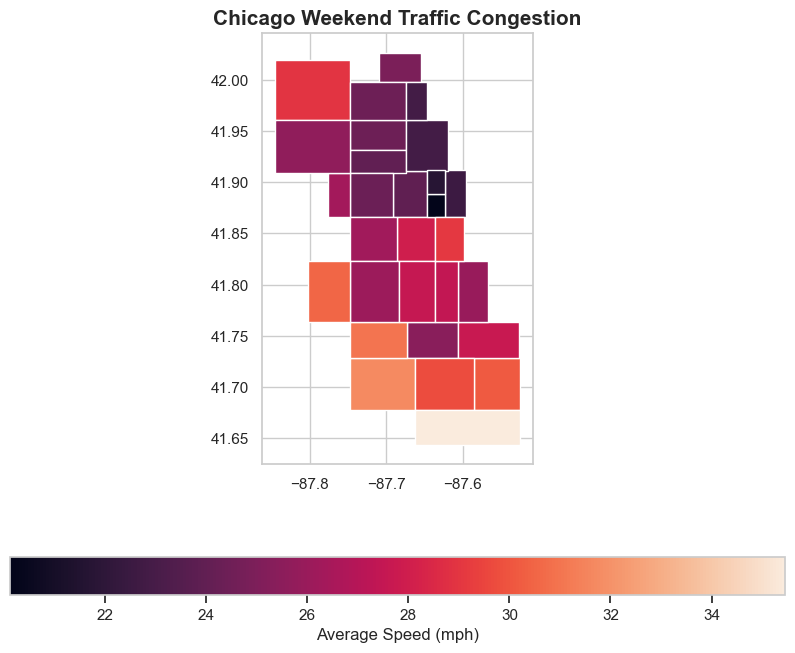

In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry import Polygon
import geopandas as gpd

# Create a GeoDataFrame for weekend data with a geometry column
weekend_gdf = gpd.GeoDataFrame(weekend_data, 
                               geometry=weekend_data.apply(create_polygon, axis=1),
                               crs="EPSG:4326")

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=100)
weekend_gdf.plot(column='SPEED', ax=ax, legend=True, 
                 legend_kwds={'label': "Average Speed (mph)", 'orientation': "horizontal"})

# Add title
ax.set_title("Chicago Weekend Traffic Congestion", fontsize=15, fontweight='bold')

# Show the plot
plt.show()


In [43]:
# Assuming you want to reverse the 'viridis' colormap
cmap = plt.cm.viridis
cmap_reversed = cmap.reversed()

Text(0.5, 1.0, 'Chicago Weekend Traffic Congestion')

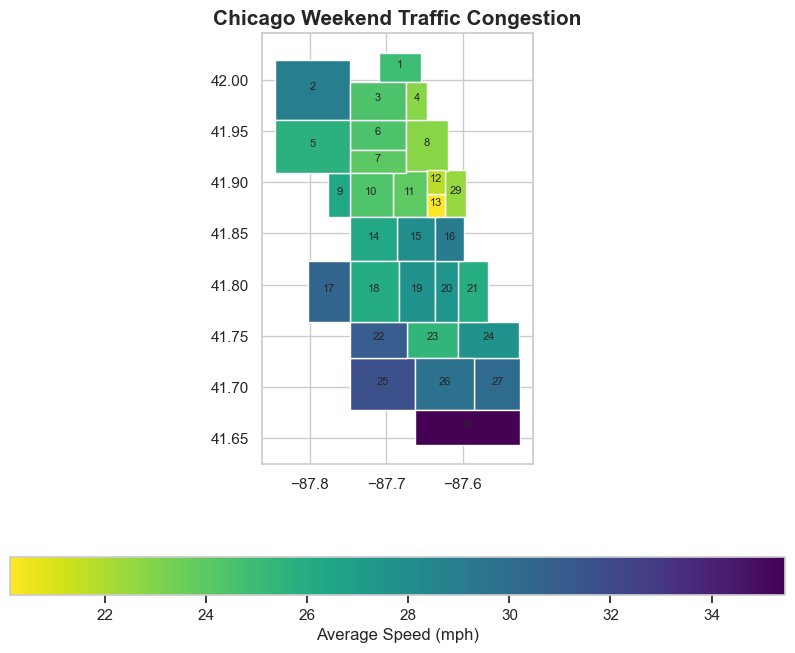

In [44]:
# Create a GeoDataFrame for weekend data with a geometry column
weekend_gdf = gpd.GeoDataFrame(weekend_data, 
                               geometry=weekend_data.apply(create_polygon, axis=1),
                               crs="EPSG:4326")


# Plotting with the reversed colormap and region names as annotations
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=100)
weekend_gdf.plot(column='SPEED', ax=ax, legend=True, cmap=cmap_reversed,
                 legend_kwds={'label': "Average Speed (mph)", 'orientation': "horizontal"})

# Annotate with region IDs
for idx, row in weekend_gdf.iterrows():
    plt.annotate(text=row['REGION_ID'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8)
# Add title
ax.set_title("Chicago Weekend Traffic Congestion", fontsize=15, fontweight='bold')



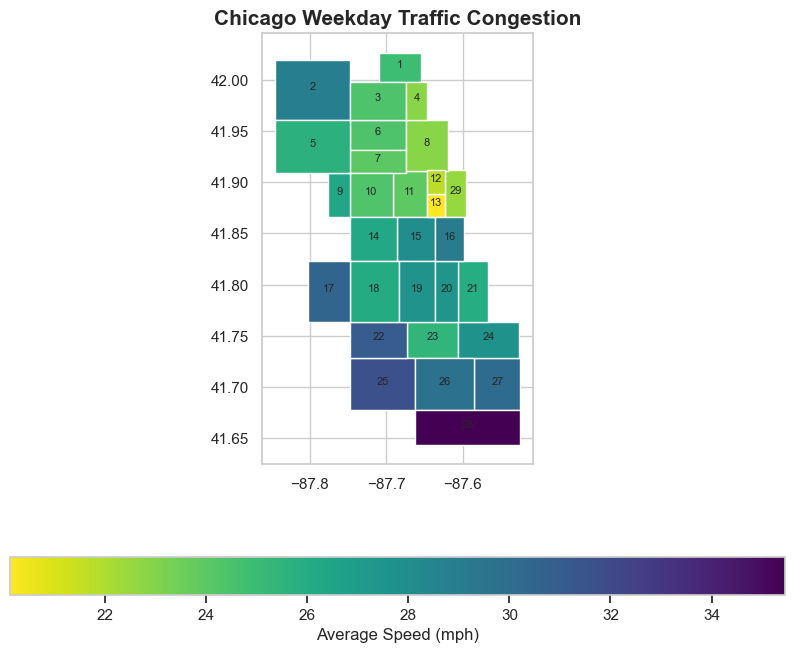

In [45]:
weekday_gdf = gpd.GeoDataFrame(weekday_data, 
                               geometry=weekday_data.apply(create_polygon, axis=1),
                               crs="EPSG:4326")

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=100)
weekday_gdf.plot(column='SPEED', ax=ax, legend=True, cmap=cmap_reversed, 
                 legend_kwds={'label': "Average Speed (mph)", 'orientation': "horizontal"})

for idx, row in weekday_gdf.iterrows():
    plt.annotate(text=row['REGION_ID'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8)
# Add title
ax.set_title("Chicago Weekday Traffic Congestion", fontsize=15, fontweight='bold')

# Show the plot
plt.show()

In [46]:
# Since we don't have the names for each region, we'll just demonstrate with the REGION_ID for now
region_names_table = traffic_data[['REGION_ID', 'REGION']].drop_duplicates().sort_values('REGION_ID').set_index('REGION_ID')
region_names_table 

,REGION
REGION_ID,
1,Rogers Park - West Ridge
2,Far North West
3,North Park-Albany-Linconl Sq
4,Edge Water-Uptown
5,Dunning-Portage-Belmont Cragn
6,Irving Park-Avondale-North Ctr
7,Hermosa-Logan Square
8,Lincoln Park-Lake View
9,Austin


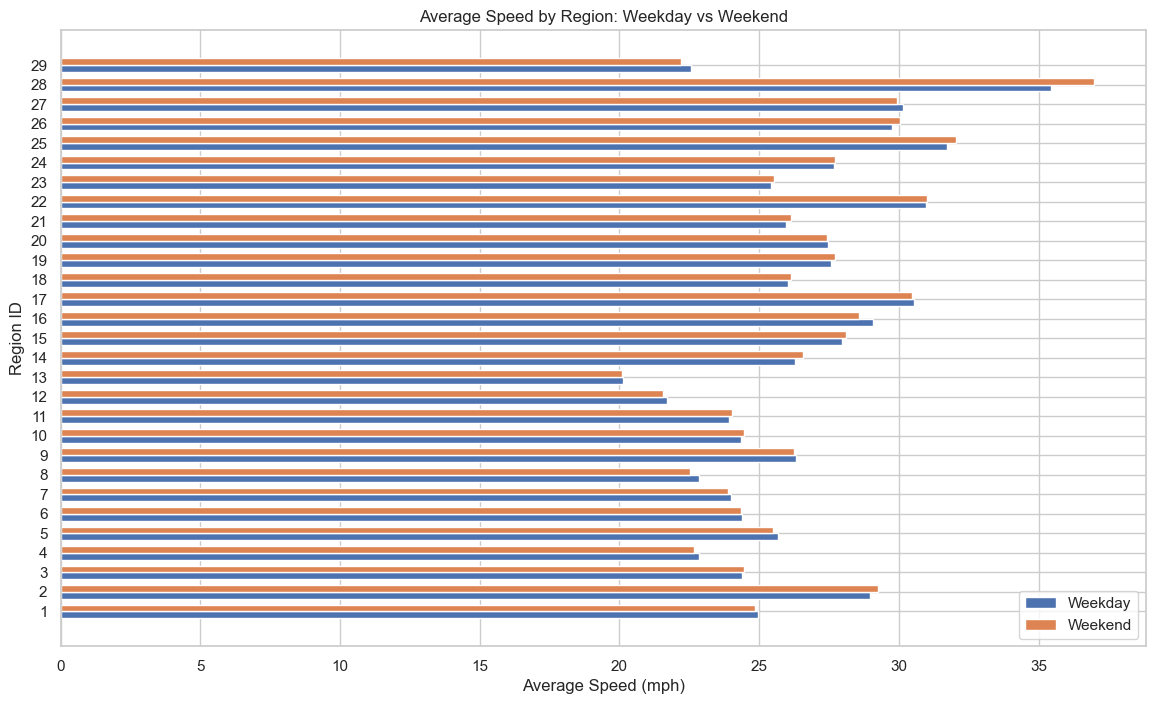

In [47]:
import matplotlib.pyplot as plt

# Assuming average_speed_combined is a DataFrame with the necessary data
# Replace NaN with 0 for regions that don't have data in either weekdays or weekends
average_speed_combined.fillna(0, inplace=True)

# Now let's plot the bar graph
fig, ax = plt.subplots(figsize=(14, 8))

# Set the positions and width for the bars
positions = list(range(len(average_speed_combined['REGION_ID'])))
width = 0.35

# Plotting both weekday and weekend speeds horizontally
bars_weekday = ax.barh([p - width/2 for p in positions], average_speed_combined['SPEED_weekday'], width, label='Weekday')
bars_weekend = ax.barh([p + width/2 for p in positions], average_speed_combined['SPEED_weekend'], width, label='Weekend')

# Adding the region names to the y-label
ax.set_yticks(positions)
ax.set_yticklabels(average_speed_combined['REGION_ID'])

# Setting the rest of the labels
ax.set_ylabel('Region ID')
ax.set_xlabel('Average Speed (mph)')
ax.set_title('Average Speed by Region: Weekday vs Weekend')
ax.legend()

# Show the plot
plt.show()


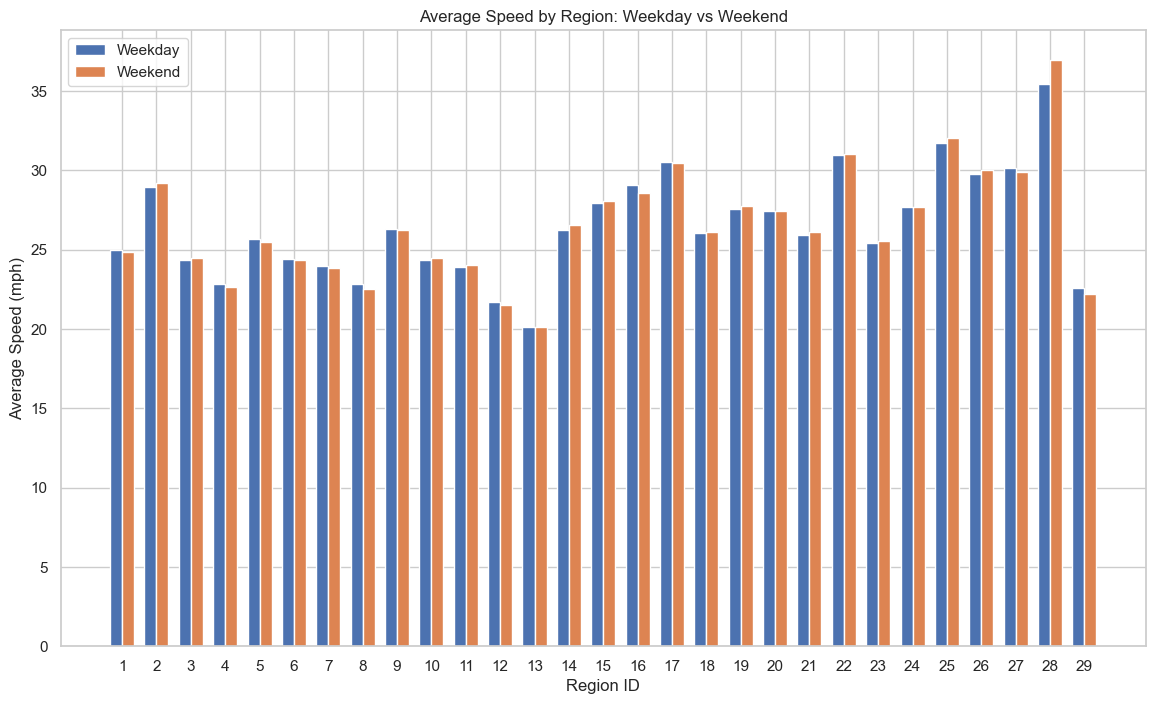

In [48]:
# Replace NaN with 0 for regions that don't have data in either weekdays or weekends
average_speed_combined.fillna(0, inplace=True)

# Now let's plot the bar graph
fig, ax = plt.subplots(figsize=(14, 8))

# Set the positions and width for the bars
positions = list(range(len(average_speed_combined['REGION_ID'])))
width = 0.35

# Plotting both weekday and weekend speeds
bars_weekday = ax.bar(positions, average_speed_combined['SPEED_weekday'], width, label='Weekday')
bars_weekend = ax.bar([p + width for p in positions], average_speed_combined['SPEED_weekend'], width, label='Weekend')

# Adding the region names to the x-label
ax.set_xticks([p + width/2 for p in positions])
ax.set_xticklabels(average_speed_combined['REGION_ID'])

# Setting the rest of the labels
ax.set_xlabel('Region ID')
ax.set_ylabel('Average Speed (mph)')
ax.set_title('Average Speed by Region: Weekday vs Weekend')
ax.legend()

# Show the plot
plt.show()

In [49]:
combined_gdf = gpd.GeoDataFrame(average_speed_combined, 
                               geometry=weekday_data.apply(create_polygon, axis=1),
                               crs="EPSG:4326")

In [50]:
combined_gdf

,REGION_ID,SPEED_weekday,SPEED_weekend,geometry
0,1,24.952232,24.844413,"POLYGON ((-87.62308 41.91140, -87.59538 41.911..."
1,2,28.964022,29.237032,"POLYGON ((-87.67298 41.76407, -87.60633 41.764..."
2,3,24.382435,24.462271,"POLYGON ((-87.58485 41.72847, -87.52444 41.728..."
3,4,22.862928,22.678444,"POLYGON ((-87.60633 41.76407, -87.52639 41.764..."
4,5,25.668147,25.503839,"POLYGON ((-87.70964 42.02644, -87.65456 42.026..."
5,6,24.386079,24.355805,"POLYGON ((-87.74746 41.96067, -87.67459 41.960..."
6,7,24.003012,23.872587,"POLYGON ((-87.69162 41.91056, -87.64721 41.910..."
7,8,22.851576,22.540944,"POLYGON ((-87.74746 41.72847, -87.66251 41.728..."
8,9,26.312674,26.239542,"POLYGON ((-87.66251 41.72847, -87.58485 41.728..."
9,10,24.359340,24.463951,"POLYGON ((-87.68537 41.86613, -87.63632 41.866..."


In [51]:
combined_gdf['weekends_faster'] = combined_gdf['SPEED_weekday'] > combined_gdf['SPEED_weekend']
combined_gdf['weekdays_faster'] = combined_gdf['SPEED_weekday'] < combined_gdf['SPEED_weekend']

In [52]:
faster_weekends_gdf = combined_gdf[combined_gdf['weekends_faster']]
faster_weekdays_gdf = combined_gdf[combined_gdf['weekdays_faster']]

In [53]:
faster_weekends_gdf

,REGION_ID,SPEED_weekday,SPEED_weekend,geometry,weekends_faster,weekdays_faster
0,1,24.952232,24.844413,"POLYGON ((-87.62308 41.91140, -87.59538 41.911...",True,False
3,4,22.862928,22.678444,"POLYGON ((-87.60633 41.76407, -87.52639 41.764...",True,False
4,5,25.668147,25.503839,"POLYGON ((-87.70964 42.02644, -87.65456 42.026...",True,False
5,6,24.386079,24.355805,"POLYGON ((-87.74746 41.96067, -87.67459 41.960...",True,False
6,7,24.003012,23.872587,"POLYGON ((-87.69162 41.91056, -87.64721 41.910...",True,False
7,8,22.851576,22.540944,"POLYGON ((-87.74746 41.72847, -87.66251 41.728...",True,False
8,9,26.312674,26.239542,"POLYGON ((-87.66251 41.72847, -87.58485 41.728...",True,False
11,12,21.708145,21.544724,"POLYGON ((-87.84621 42.01910, -87.74746 42.019...",True,False
12,13,20.110929,20.107138,"POLYGON ((-87.74746 41.93184, -87.67459 41.931...",True,False
15,16,29.078773,28.589329,"POLYGON ((-87.74746 41.86613, -87.68537 41.866...",True,False


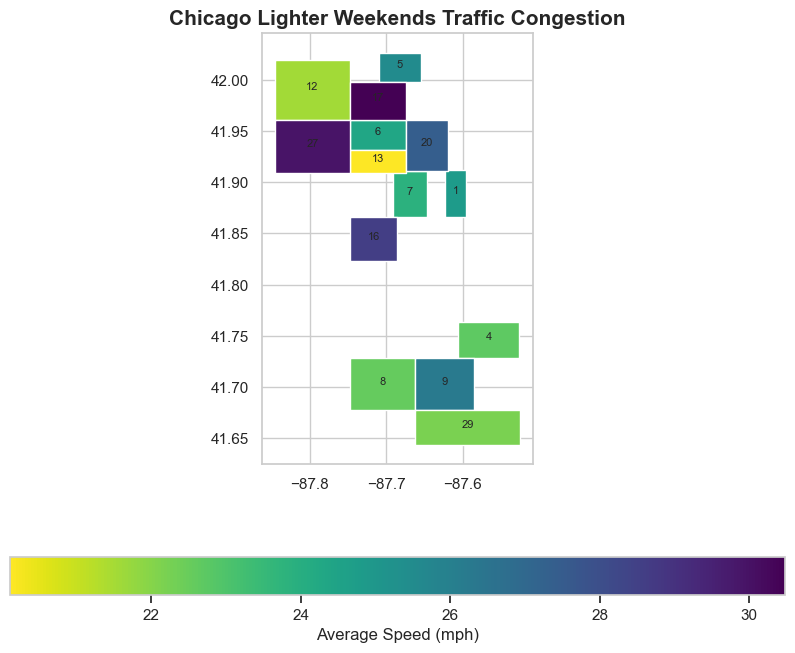

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=100)
faster_weekends_gdf.plot(column='SPEED_weekend', ax=ax, legend=True, cmap=cmap_reversed, 
                 legend_kwds={'label': "Average Speed (mph)", 'orientation': "horizontal"})

for idx, row in faster_weekends_gdf.iterrows():
    plt.annotate(text=row['REGION_ID'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8)
# Add title
ax.set_title("Chicago Lighter Weekends Traffic Congestion", fontsize=15, fontweight='bold')

# Show the plot
plt.show()

In [55]:
faster_weekdays_gdf

,REGION_ID,SPEED_weekday,SPEED_weekend,geometry,weekends_faster,weekdays_faster
1,2,28.964022,29.237032,"POLYGON ((-87.67298 41.76407, -87.60633 41.764...",False,True
2,3,24.382435,24.462271,"POLYGON ((-87.58485 41.72847, -87.52444 41.728...",False,True
9,10,24.359340,24.463951,"POLYGON ((-87.68537 41.86613, -87.63632 41.866...",False,True
10,11,23.916796,24.013016,"POLYGON ((-87.60633 41.82279, -87.56626 41.822...",False,True
13,14,26.267477,26.561904,"POLYGON ((-87.74746 41.76407, -87.67298 41.764...",False,True
14,15,27.964947,28.103479,"POLYGON ((-87.74746 41.90927, -87.69162 41.909...",False,True
17,18,26.049207,26.134164,"POLYGON ((-87.74746 41.82279, -87.68373 41.822...",False,True
18,19,27.571271,27.730803,"POLYGON ((-87.64721 41.88886, -87.62308 41.888...",False,True
20,21,25.943493,26.125874,"POLYGON ((-87.67459 41.99795, -87.64644 41.997...",False,True
21,22,30.977814,31.020218,"POLYGON ((-87.68373 41.82279, -87.63632 41.822...",False,True


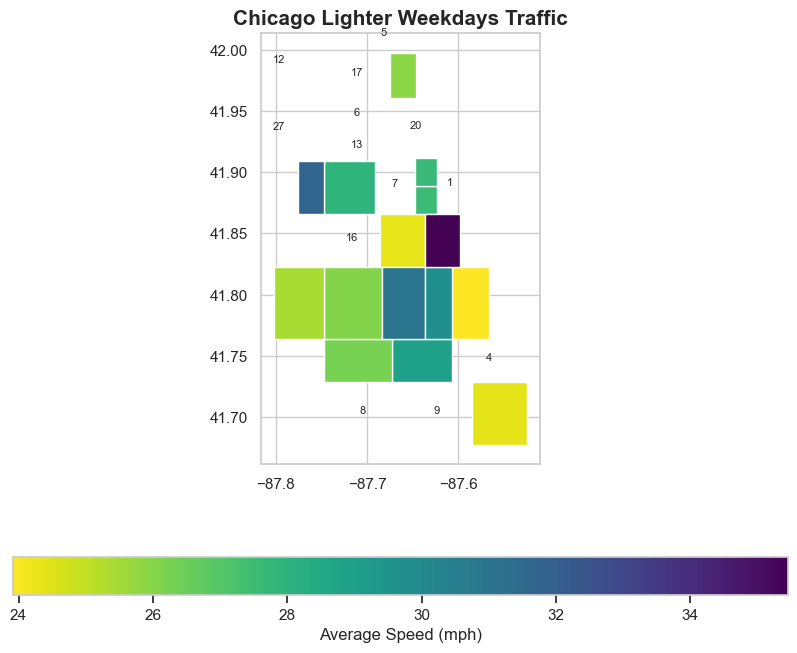

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=100)
faster_weekdays_gdf.plot(column='SPEED_weekday', ax=ax, legend=True, cmap=cmap_reversed, 
                 legend_kwds={'label': "Average Speed (mph)", 'orientation': "horizontal"})

for idx, row in faster_weekends_gdf.iterrows():
    plt.annotate(text=row['REGION_ID'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8)
# Add title
ax.set_title("Chicago Lighter Weekdays Traffic", fontsize=15, fontweight='bold')

# Show the plot
plt.show()

In [57]:
weekdays_name = faster_weekdays_gdf.merge(region_to_id_mapping, on='REGION_ID',  how='left')
weekdays_name.drop(['weekdays_faster', 'weekends_faster'], axis=1, inplace=True)

In [58]:
weekdays_name

,REGION_ID,SPEED_weekday,SPEED_weekend,geometry,REGION
0,2,28.964022,29.237032,"POLYGON ((-87.67298 41.76407, -87.60633 41.764...",Far North West
1,3,24.382435,24.462271,"POLYGON ((-87.58485 41.72847, -87.52444 41.728...",North Park-Albany-Linconl Sq
2,10,24.359340,24.463951,"POLYGON ((-87.68537 41.86613, -87.63632 41.866...",Humboldt-Garfield Prk E/W
3,11,23.916796,24.013016,"POLYGON ((-87.60633 41.82279, -87.56626 41.822...",West Town-Near West
4,14,26.267477,26.561904,"POLYGON ((-87.74746 41.76407, -87.67298 41.764...",Lawndale N/S
5,15,27.964947,28.103479,"POLYGON ((-87.74746 41.90927, -87.69162 41.909...",Bridgeport-McKinley-Lower West
6,18,26.049207,26.134164,"POLYGON ((-87.74746 41.82279, -87.68373 41.822...",South West Side
7,19,27.571271,27.730803,"POLYGON ((-87.64721 41.88886, -87.62308 41.888...",New City-Englewood-W Englewood
8,21,25.943493,26.125874,"POLYGON ((-87.67459 41.99795, -87.64644 41.997...",Hyde Park-Kenwood-Woodlawn
9,22,30.977814,31.020218,"POLYGON ((-87.68373 41.82279, -87.63632 41.822...",Ashburn


In [59]:
weekdays_name.to_csv('/Users/jinwens/Desktop/2023Fall/STAT303/project/weekdays_name.csv', index=False)

In [60]:
weekends_name = faster_weekends_gdf.merge(region_to_id_mapping, on='REGION_ID',  how='left')
weekends_name.drop(['weekdays_faster', 'weekends_faster'], axis=1, inplace=True)

In [82]:
weekends_name.to_csv('/Users/jinwens/Desktop/2023Fall/STAT303/project/weekends_name.csv', index=False)